# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold

%matplotlib inline

In [5]:
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=500., early_exaggeration=15.)

n_components: 嵌入空間的維度

perpexity: 混亂度，表示t-SNE優化過程中考慮鄰近點的多少，預設為30，建議取值在5到50之間

early_exaggeration:	表示嵌入空間群間距的大小，預設為12，該值越大，可視化後的群間距越大

learning_rate: 學習率，表示梯度下降的快慢，預設為200，建議取值在10到1000之間

n_iter:	遞迴次數，預設為1000，自定義設置時應保證大於250

min_grad_norm: 如果梯度小於該值，則停止優化。預設為1e-7

metric: 表示向量間距離度量的方式，預設是歐式距離。如果是precomputed，則輸入X是計算好的距離矩陣。也可以是自定義的距離度量函數。

init: 初始化，預設為random。取值為random為隨機初始化，取值為pca為利用PCA進行初始化（常用），取值為numpy數組時必須shape=(n_samples, n_components)

verbose: 是否印出優化信息，取值0或1，預設0 =>不打印信息。打印的信息為：近鄰點數量、花費時間、σ、KL散度、誤差等

random_state: 隨機數種子，整數或RandomState對象

method: 兩種優化方法：barnets_hut和exact。第一種耗时時O(NlogN)，第二種耗時O(N^2)但是誤差小，同時第二種方法不能用於百萬集樣本

angle: 當method=barnets_hut時，該參數有用，用於均衡效率與誤差，預設值為0.5，該值越大，效率越高&誤差越大，否則反之。當該值在0.2-0.8之間時，無變化。    
    

Computing t-SNE embedding


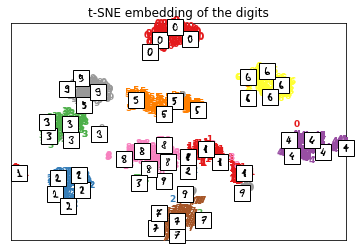

In [6]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()